In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
image_path = "duck.png"  # Change this to your image path
image_bgr = cv2.imread(image_path)

In [2]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


In [4]:
height, width, channels = image_rgb.shape
print(f"Image Dimensions: {height} x {width} x {channels}")

Image Dimensions: 368 x 368 x 3


In [5]:
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

Total Pixels: 135424


In [6]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Step 6: Convert Grayscale to Binary using a threshold
threshold_value = 127  # Midpoint threshold
_, image_binary = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

In [7]:
black_pixel_count = np.sum(image_binary == 0)
print(f"Total Black Pixels in Binary Image: {black_pixel_count}")

Total Black Pixels in Binary Image: 96075


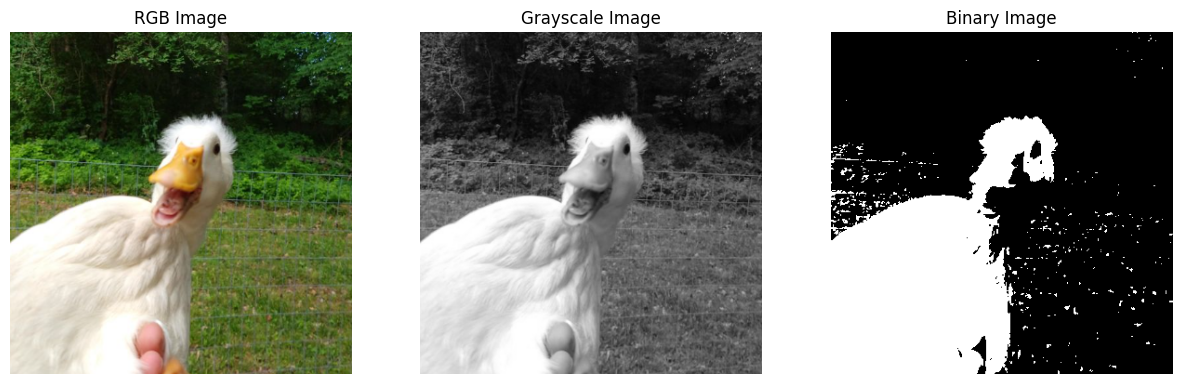

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("RGB Image")
axes[0].axis("off")

axes[1].imshow(image_gray, cmap="gray")
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

axes[2].imshow(image_binary, cmap="gray")
axes[2].set_title("Binary Image")
axes[2].axis("off")

plt.show()


In [9]:
cv2.imwrite("duck_rgb.png", cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
cv2.imwrite("duck_gray.png", image_gray)
cv2.imwrite("duck_binary.png", image_binary)

print("Images saved successfully as 'duck_rgb.png', 'duck_gray.png', and 'duck_binary.png'.")

Images saved successfully as 'duck_rgb.png', 'duck_gray.png', and 'duck_binary.png'.


###TASK 2

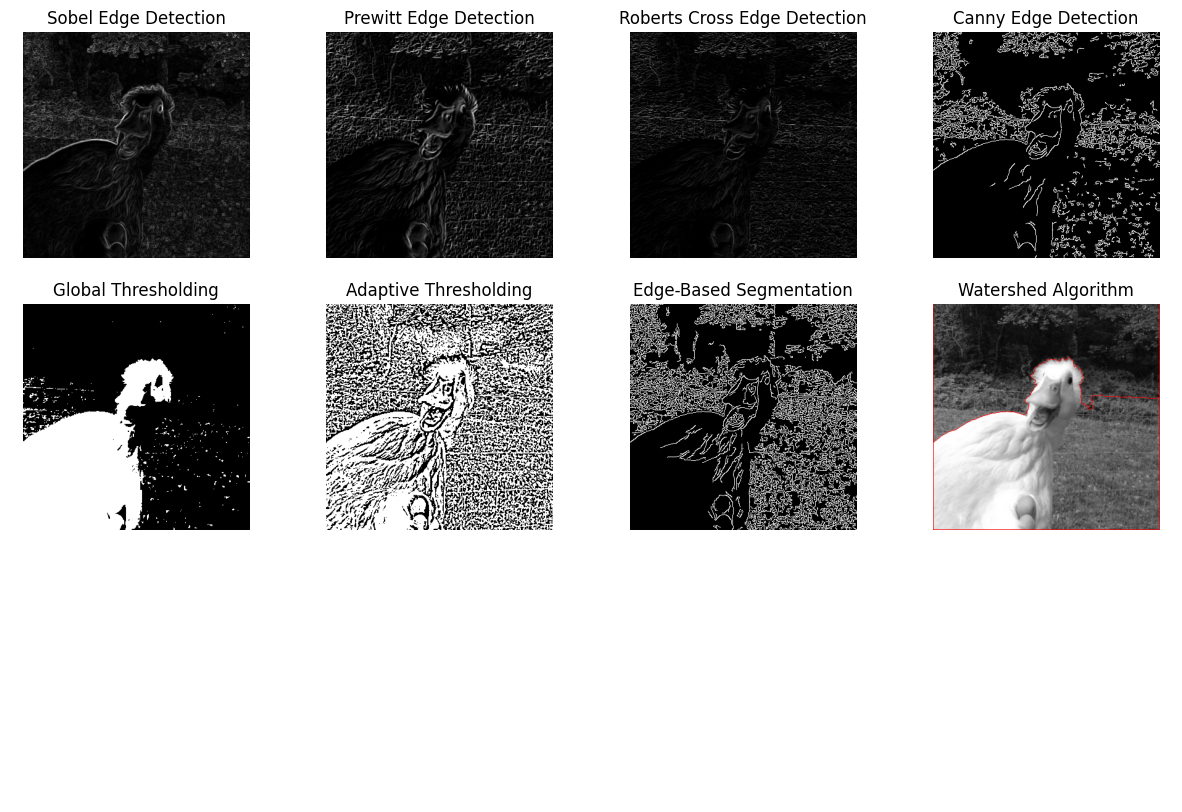

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "duck.png"
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Edge Detection

# Sobel Operator
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Prewitt Operator
prewitt_x = cv2.filter2D(image_gray, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(image_gray, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))

# Roberts Cross Operator
roberts_x = cv2.filter2D(image_gray, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(image_gray, -1, np.array([[0, 1], [-1, 0]]))
roberts_combined = cv2.magnitude(roberts_x.astype(np.float32), roberts_y.astype(np.float32))

# Canny Edge Detector
canny_edges = cv2.Canny(image_gray, 100, 200)

# Step 2: Image Segmentation

# Global Thresholding
_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Edge-Based Segmentation (Using Canny)
edge_segmentation = cv2.Canny(image_gray, 50, 150)

# Watershed Algorithm (Region-Based Segmentation)
_, binary_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers + 1
markers[unknown == 255] = 0
image_rgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
cv2.watershed(image_rgb, markers)
image_rgb[markers == -1] = [255, 0, 0]

# Display Results
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Edge Detection Plots
axes[0, 0].imshow(sobel_combined, cmap="gray")
axes[0, 0].set_title("Sobel Edge Detection")
axes[0, 1].imshow(prewitt_combined, cmap="gray")
axes[0, 1].set_title("Prewitt Edge Detection")
axes[0, 2].imshow(roberts_combined, cmap="gray")
axes[0, 2].set_title("Roberts Cross Edge Detection")
axes[0, 3].imshow(canny_edges, cmap="gray")
axes[0, 3].set_title("Canny Edge Detection")

# Segmentation Plots
axes[1, 0].imshow(global_thresh, cmap="gray")
axes[1, 0].set_title("Global Thresholding")
axes[1, 1].imshow(adaptive_thresh, cmap="gray")
axes[1, 1].set_title("Adaptive Thresholding")
axes[1, 2].imshow(edge_segmentation, cmap="gray")
axes[1, 2].set_title("Edge-Based Segmentation")
axes[1, 3].imshow(image_rgb)
axes[1, 3].set_title("Watershed Algorithm")

for ax in axes.flatten():
    ax.axis("off")

plt.show()
